In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skimage.measure as measure
import glob
import os

In [3]:
def txt2labelarray(txtFile):
    true_boxes = []

    with open(txtFile) as f:
        for cnt, line in enumerate(f):
            c,x,y,w,h = map(float, line.split())
            x = x*1024
            y = y*1024
            w = w*1024
            h = h*1024
            x1 = x - w/2
            x2 = x + w/2
            y1 = y - h/2
            y2 = y + h/2
            lis_for_each_sample = []
            lis_for_each_sample.append(0)
            lis_for_each_sample.append(x1)
            lis_for_each_sample.append(y1)
            lis_for_each_sample.append(x2)
            lis_for_each_sample.append(y2)
            
            true_boxes.append(lis_for_each_sample)
        labels = np.asarray(true_boxes)
    return labels

In [4]:
def entropy_image(image, exp_time, labels=False, whole_img=True):
    entropys = [exp_time]
    if whole_img:
        entropy = measure.shannon_entropy(image)
        entropys.append(entropy)
    if labels.shape:
        for idx in range(labels.shape[0]):
            label = labels[idx]
            image_crop = image[int(label[2]):int(label[4]), int(label[1]):int(label[3]),:]
            # cv2.imwrite(str(exp_time)+".png", image_crop)
            entropy = measure.shannon_entropy(image_crop)
            entropys.append(entropy)
    
    return entropys

In [5]:

def entropy_split(image, labels):
    entropys = []
    for idx in range(labels.shape[0]):
        label = labels[idx]
        image_crop = image[int(label[2]):int(label[4]), int(label[1]):int(label[3]),:]
        # cv2.imwrite(str(exp_time)+".png", image_crop)
        entropy = measure.shannon_entropy(image_crop)
        entropys.append(entropy)

    return entropys

In [6]:
def entropy_images(image, exp_time, labels=False):
    entropy = measure.shannon_entropy(image)

    return entropy

In [7]:
exp_time_list = [15, 30, 60, 125, 250, 500, 1000, 2000, 4000]
entropy_list = [exp_time_list]

image_path1 = "/home/aru/phd/objective2/dataset/single_exp/"
image_path2 = "/1024/split/images/img62.jpg"

In [8]:
image_path2 = "/1024/split/images/"
image_path2_rotate = "/1024/split_rotate/images/"

In [9]:
entropy_list2 = [exp_time_list]
label_paths = "/home/aru/phd/objective2/dataset/labels"
for label_path in glob.glob("/home/aru/phd/objective2/dataset/labels/*.txt"):
    label_name = os.path.basename(label_path)
    name_only = label_name.split(".")[0]
    image_name = label_name.split(".")[0]+".jpg"
#     label_path = os.path.join(label_paths, label_name)
    labels = txt2labelarray(label_path)

    entropys_per_image = [name_only]
    entropys_per_image2 = [name_only]
    for exp_time in exp_time_list:
        image_path = image_path1 + str(exp_time) + image_path2 + image_name
        if not os.path.exists(image_path):
            image_path = image_path1 + str(exp_time) + image_path2_rotate + image_name   
        image = cv2.imread(image_path)
        entropys = entropy_split(image,labels=labels)
        if len(entropys)>1:
            entropys_per_image2.append(entropys[1]) 
        entropys_per_image.append(entropys[0])
    entropy_list.append(entropys_per_image)
    if len(entropys_per_image2)>1:
        entropy_list2.append(entropys_per_image2)
# add image name and idx number can be taken as array and array2

In [10]:
len(entropy_list)

121

In [11]:
len(entropy_list2)

25

In [12]:
for l in entropy_list:
    if l[0]=="img71_rotate":
        print(l)

['img71_rotate', 7.120413024875342, 6.984934638069702, 6.4187870412346735, 5.641898034420644, 4.837852876868566, 4.013845013860939, 3.2049214708712936, 2.523760231493427, 1.799492833260347]


In [13]:
entropy_list[0]

[15, 30, 60, 125, 250, 500, 1000, 2000, 4000]

In [14]:
name_seq = [x[0] for x in entropy_list[1:]]

In [15]:
name_seq2 = [x[0] for x in entropy_list2[1:]]

In [16]:
for idx,x in enumerate(entropy_list[1:]):
    assert name_seq[idx]==x[0], "fail"

In [17]:
for idx,x in enumerate(entropy_list2[1:]):
    assert name_seq2[idx]==x[0], "fail at {} is {}".format(name_seq2[idx+1],x[0])

In [18]:
name_seq[1]

'img15'

In [19]:
entropy_list_for_arr = [x[1:] for x in entropy_list[1:]]
entropy_list_for_arr2 = [x[1:] for x in entropy_list2[1:]]

In [20]:
entropys_arr = np.array(entropy_list_for_arr)
entropys_arr2 = np.array(entropy_list_for_arr2)

In [21]:
entropys_arr[1]

array([5.96917295, 6.96267362, 7.19480073, 6.91500725, 6.29648555,
       5.62549103, 4.85931722, 4.05654005, 3.34618174])

In [22]:
entropys_arr2[1,:]

array([3.63081422, 5.53780636, 6.80214294, 7.55360746, 7.67388901,
       7.31470941, 6.78666628, 6.11725639, 5.35409846])

In [23]:
entropys_arr_all = np.vstack((entropys_arr, entropys_arr2))

In [24]:
entropys_arr_all.shape

(144, 9)

In [25]:
# entropys_arr_all = np.delete(entropys_arr_all, 127, 0)

In [26]:
entropys_arr_all.shape

(144, 9)

In [27]:
entropys_arr_all[127,:]

array([0.35775464, 2.0368191 , 3.8755065 , 5.78670683, 7.27876135,
       7.72532739, 7.5431213 , 7.07749284, 6.49811695])

In [28]:
import pandas as pd
from sklearn.cluster import KMeans

In [29]:
# entropys_arr_all = np.delete(entropys_arr_all, 0, 0)

In [30]:
entropy_list[0]

[15, 30, 60, 125, 250, 500, 1000, 2000, 4000]

In [31]:
entropys_arr_all[0,:]

array([6.92881767, 7.03235771, 6.6271993 , 5.91414894, 5.10831888,
       4.31476728, 3.5137355 , 2.85252591, 2.06225522])

In [32]:
entropys_arr_all.shape

(144, 9)

In [33]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(entropys_arr_all)

In [34]:
kmeans.cluster_centers_

array([[6.5819061 , 6.83679075, 6.57837394, 5.9902298 , 5.25933927,
        4.51065502, 3.77728422, 3.05096748, 2.34650549],
       [2.62006566, 4.27652179, 5.75539792, 6.89700053, 7.41875407,
        7.35938125, 6.94678884, 6.35061914, 5.66529106]])

In [35]:
kmeans.labels_

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [36]:
label_arr_all = kmeans.labels_

In [37]:
name_seq_arr_all = np.array(name_seq + name_seq2)

In [38]:
name_seq_arr_all.shape

(144,)

In [39]:
name_seq_arr_all[121]

'img75'

In [40]:
label_arr_all.shape

(144,)

In [41]:
arr = np.vstack((name_seq_arr_all, label_arr_all)).T

In [42]:
arr.shape

(144, 2)

In [43]:
arr[:,1]

array(['0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0',
       '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1',
       '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0',
       '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0',
       '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1',
       '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '1'], dtype='<U13')

In [44]:
lis=[]
for idx in range(arr.shape[0]):
    if idx<120:
        lis.append(0)
    else:
        lis.append(1)
defect_num_arr = np.array(lis)

In [45]:
defect_num_arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
defect_num_arr.shape

(144,)

In [47]:
arr_for_csv = np.vstack((arr.T, defect_num_arr)).T

In [48]:
arr_for_csv

array([['img45', '0', '0'],
       ['img15', '0', '0'],
       ['img30', '0', '0'],
       ['img55', '0', '0'],
       ['img51', '1', '0'],
       ['img73', '1', '0'],
       ['img75', '0', '0'],
       ['img60', '1', '0'],
       ['img112', '1', '0'],
       ['img18', '1', '0'],
       ['img76_rotate', '0', '0'],
       ['img36', '0', '0'],
       ['img29', '0', '0'],
       ['img20', '1', '0'],
       ['img102', '1', '0'],
       ['img17', '0', '0'],
       ['img54', '1', '0'],
       ['img61', '0', '0'],
       ['img108', '0', '0'],
       ['img75_rotate', '0', '0'],
       ['img101', '0', '0'],
       ['img12', '0', '0'],
       ['img126_rotate', '0', '0'],
       ['img98', '1', '0'],
       ['img91', '0', '0'],
       ['img2', '0', '0'],
       ['img23', '1', '0'],
       ['img35', '0', '0'],
       ['img19', '0', '0'],
       ['img87_rotate', '0', '0'],
       ['img24', '1', '0'],
       ['img56', '1', '0'],
       ['img34', '1', '0'],
       ['img106', '0', '0'],
       ['img87'

In [49]:
lis_to_savee = arr_for_csv.tolist()

In [50]:
lis_to_savee[0:2]

[['img45', '0', '0'], ['img15', '0', '0']]

In [51]:
import csv
with open("img_entropy_divide.csv", "w") as f:
    wr = csv.writer(f)
    wr.writerows(lis_to_savee)

In [52]:
label_arr_all

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

/tmp/ipykernel_15874/3766008932.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"], fontweight='bold')
/tmp/ipykernel_15874/3766008932.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "0", "1","2", "3", "4", "5", "6", "7", "8"], fontweight='bold')


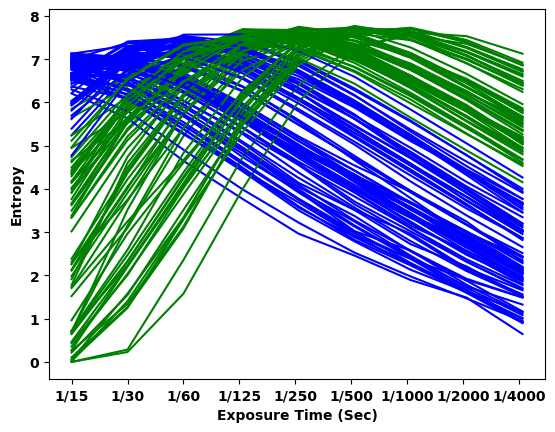

In [111]:

fig,ax = plt.subplots()
for idx in range(entropys_arr_all.shape[0]):
    if label_arr_all[idx]==0:
        c = "b"
    else:
        c = "g"
    ax.plot(np.log2(np.array(entropy_list[0])/15), entropys_arr_all[idx,:], c)
plt.xlabel("Exposure Time (Sec)", size=10, fontweight='bold')
plt.ylabel("Entropy", size=10, fontweight='bold')
ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"], fontweight='bold')
ax.set_yticklabels(["0", "0", "1","2", "3", "4", "5", "6", "7", "8"], fontweight='bold')

fig.savefig("entropys_imgs_labels_clustered.png")

In [58]:
# Entropy for removed background
import numpy as np
import cv2
img = cv2.imread("/home/aru/phd/objective2/dataset/rembg_images/30/img12.jpg", cv2.IMREAD_GRAYSCALE)
marg, bins = np.histogramdd(np.ravel(img), bins = 256)
assert bins[0][0]==0.0, "first bin not zero pixel value"
marg = marg[1:]/(img.size - marg[0])

marg = list(filter(lambda p: p > 0, np.ravel(marg)))
entropy = -np.sum(np.multiply(marg, np.log2(marg)))
entropy

7.64694601395872

In [60]:
import skimage.measure as measure
img = cv2.imread("/home/aru/phd/objective2/dataset/rembg_images/30/img12.jpg", cv2.IMREAD_GRAYSCALE)
entropy = measure.shannon_entropy(img)
entropy

3.6116262910999666

In [ ]:
# ALL IMAGES WHOLE ENTROPY

In [61]:
def entropy_images_rm_bg(image_path, labels=False):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    marg, bins = np.histogramdd(np.ravel(img), bins = 256)
    assert bins[0][0]==0.0, "first bin not zero pixel value"
    marg_rm_bg = marg[1:]/(img.size - marg[0])

    marg_rm_bg = list(filter(lambda p: p > 0, np.ravel(marg_rm_bg)))
    entropy = -np.sum(np.multiply(marg_rm_bg, np.log2(marg_rm_bg)))

    return entropy

In [64]:
image_path1 = "/home/aru/phd/objective2/dataset/rembg_images/"
entropy_list = [exp_time_list]

for image_path in glob.glob("/home/aru/phd/objective2/dataset/rembg_images/15/*.jpg"):
    image_name = os.path.basename(image_path)

    entropys_per_image = []
    for exp_time in exp_time_list:
        image_path = image_path1 + str(exp_time) + "/" + image_name
        # image = cv2.imread(image_path)
        entropys = entropy_images_rm_bg(image_path)
        entropys_per_image.append(entropys)
    entropy_list.append(entropys_per_image)

entropys_arr = np.array(entropy_list)
#     plot_entropys_rows(entropys_arr)

In [108]:
def plot_only_image(entropy_arr):
    fig,ax = plt.subplots()
    for idx in range(entropy_arr.shape[0]-1):
        ax.plot(np.log2(entropy_arr[0,:]/15), entropy_arr[idx+1,:], "r")
    plt.xlabel("Exposure Time (Sec)", size=10, fontweight='bold')
    plt.ylabel("Entropy", size=10, fontweight='bold')
    ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"], fontweight='bold')
    ax.set_yticklabels(["0", "1","2", "3", "4", "5", "6", "7", "8"], fontweight='bold')
    fig.savefig("entropys_imgs1.png")

/tmp/ipykernel_15874/3304289418.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"], fontweight='bold')
/tmp/ipykernel_15874/3304289418.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "1","2", "3", "4", "5", "6", "7", "8"], fontweight='bold')


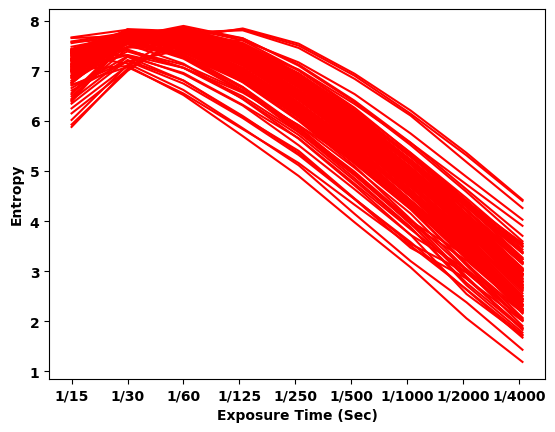

In [109]:
plot_only_image(entropys_arr)

In [68]:
entropys_arr

(114, 9)

In [72]:
img_mean = np.mean(entropys_arr[1:,:], axis=0)
img_mean

array([7.06921908, 7.61459137, 7.53431   , 7.08848369, 6.41058518,
       5.5874792 , 4.67989525, 3.72934016, 2.71622143])

In [73]:
label_mean = kmeans.cluster_centers_

In [74]:
label_mean

array([[6.5819061 , 6.83679075, 6.57837394, 5.9902298 , 5.25933927,
        4.51065502, 3.77728422, 3.05096748, 2.34650549],
       [2.62006566, 4.27652179, 5.75539792, 6.89700053, 7.41875407,
        7.35938125, 6.94678884, 6.35061914, 5.66529106]])

In [75]:
mean_plot_arr = np.vstack((img_mean, label_mean))
mean_plot_arr

array([[7.06921908, 7.61459137, 7.53431   , 7.08848369, 6.41058518,
        5.5874792 , 4.67989525, 3.72934016, 2.71622143],
       [6.5819061 , 6.83679075, 6.57837394, 5.9902298 , 5.25933927,
        4.51065502, 3.77728422, 3.05096748, 2.34650549],
       [2.62006566, 4.27652179, 5.75539792, 6.89700053, 7.41875407,
        7.35938125, 6.94678884, 6.35061914, 5.66529106]])

In [103]:
def plot_entropys(mean_plot_arr, entropy_arr):
    fig,ax = plt.subplots()
    color_list = ["r", "b", "g"]
    labels = ["Full Image", "Split in Bright Spot", "Split Outside Bright Spot"]
    for idx in range(mean_plot_arr.shape[0]):
        ax.plot(np.log2(entropy_arr[0,:]/15), mean_plot_arr[idx,:], color_list[idx])
    plt.xlabel("Exposure Time (Sec)", size=10, fontweight='bold')
    plt.ylabel("Entropy", size=10, fontweight='bold')
    ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"], fontweight='bold')
    ax.set_yticklabels(["2", "3", "4", "5", "6", "7"], fontweight='bold')
    ax.legend()
    fig.savefig("entropys_img_mean.png")

plot_entropys(mean_plot_arr, entropy_arr)

/tmp/ipykernel_15874/451467633.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"], fontweight='bold')
/tmp/ipykernel_15874/451467633.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["2", "3", "4", "5", "6", "7"], fontweight='bold')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


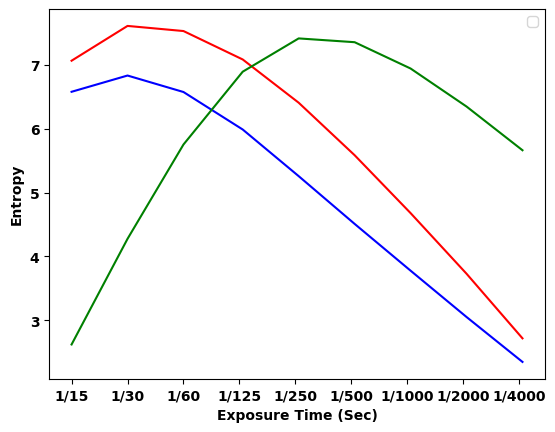

In [104]:
plot_entropys(mean_plot_arr, entropys_arr)

In [28]:
entropy_list_single = []
exp_time_list = [15, 30, 60, 125, 250, 500, 1000, 2000, 4000]
image_path1 = "/home/sakuni/phd/objective2/dataset/single_exp/"
image_path2 = "/1024/split/images/img38.jpg"
label_path = "/home/sakuni/phd/results/all_labels/img38.txt"
labels = txt2labelarray(label_path)
for exp_time in exp_time_list:
    image_path = image_path1 + str(exp_time) + image_path2
    image = cv2.imread(image_path)
    entropys = entropy_image(image, exp_time, labels=labels)
    entropy_list_single.append(entropys)



In [29]:
entropy_arr = np.array(entropy_list_single)

In [30]:
entropy_arr

array([[1.50000000e+01, 7.30243095e+00, 5.81360829e+00],
       [3.00000000e+01, 6.70006256e+00, 6.95274165e+00],
       [6.00000000e+01, 5.91073574e+00, 7.35540206e+00],
       [1.25000000e+02, 4.97961532e+00, 7.18289768e+00],
       [2.50000000e+02, 4.12190122e+00, 6.70042354e+00],
       [5.00000000e+02, 3.23284239e+00, 5.99864756e+00],
       [1.00000000e+03, 2.29349965e+00, 5.23161059e+00],
       [2.00000000e+03, 1.78529250e+00, 4.44617367e+00],
       [4.00000000e+03, 1.47727177e+00, 3.77025660e+00]])

In [91]:
def plot_entropys(entropy_arr):
    fig,ax = plt.subplots()
    color_list = ["r", "g", "b"]
    labels = ["Full Image", "Split in Bright Spot", "Split Outside Bright Spot"]
    for idx in range(entropy_arr.shape[1]-1):
        ax.plot(np.log2(entropy_arr[:,0]/15), entropy_arr[:,idx+1], color_list[idx], label=labels[idx])
    plt.xlabel("Exposure Time (Sec)", size=14)
    plt.ylabel("Entropy", size=14)
    ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"])
    ax.legend()
    fig.savefig("entropys_img.png")

/tmp/ipykernel_25431/111650766.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"])


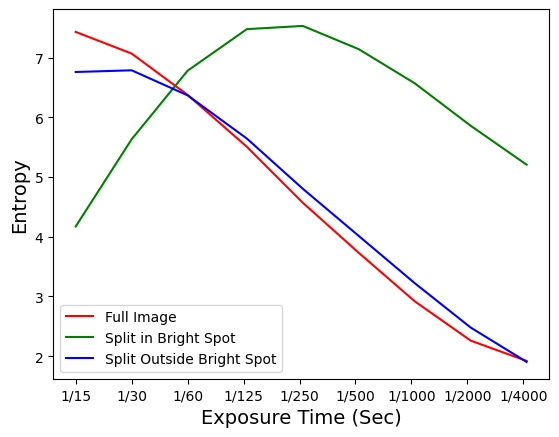

In [92]:
plot_entropys(entropy_arr)

In [108]:
def plot_entropys_rows(entropy_arr, entropy_arr2=False):
    fig,ax = plt.subplots()
    for idx in range(entropy_arr.shape[0]-1):
        ax.plot(np.log2(entropy_arr[0,:]/15), entropy_arr[idx+1, :], "r")
    
    plt.xlabel("Exposure Time (Sec)", size=14)
    plt.ylabel("Entropy", size=14)
    ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"])       
#     fig.savefig("entropys_imgs_labels.png")
    plt.show()

In [ ]:
image_path2 = "/1024/split/images/"
entropy_list_full_image = [exp_time_list]
print(entropy_list_full_image)
for image_path in glob.glob("/home/aru/phd/objective2/dataset/single_exp/60/1024/split/images/*.jpg"):
    image_name = os.path.basename(image_path)
    entropys_per_exp = []
    for exp_time in exp_time_list:
        image_path = image_path1 + str(exp_time) + image_path2 + image_name
        image = cv2.imread(image_path)
        entropys = entropy_images(image, exp_time)
        entropys_per_exp.append(entropys)
    entropy_list_full_image.append(entropys_per_exp)

entropys_arr_full_image = np.array(entropy_list_full_image)


[[15, 30, 60, 125, 250, 500, 1000, 2000, 4000]]


In [ ]:
plot_entropys_rows(entropys_arr_full_image)